In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
# from matplotlib import rc
# rc('text', usetex=True)

import qcodes as qc
from silq.tools import fit_toolbox
qc.data.data_set.DataSet.default_io.base_location = 'E:\EWJN\data'
loc_provider = qc.data.location.FormatLocation(fmt='{date}/#{counter}_{name}_{time}')
qc.data.data_set.DataSet.location_provider=loc_provider
%matplotlib notebook

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


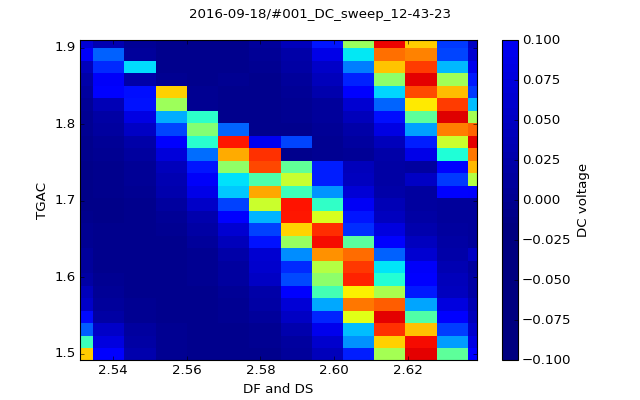

In [3]:
data = qc.load_data('2016-09-18/#001_DC_sweep_12-43-23')
plot = qc.MatPlot(data.DC_voltage)

<IPython.core.display.Javascript object>


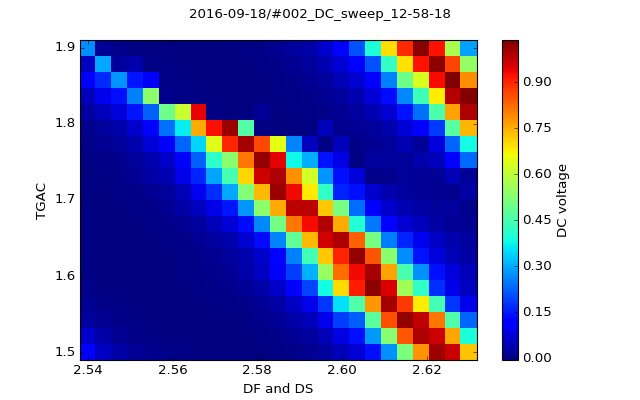

In [4]:
data = qc.load_data('2016-09-18/#002_DC_sweep_12-58-18')
plot = qc.MatPlot(data.DC_voltage)

<IPython.core.display.Javascript object>


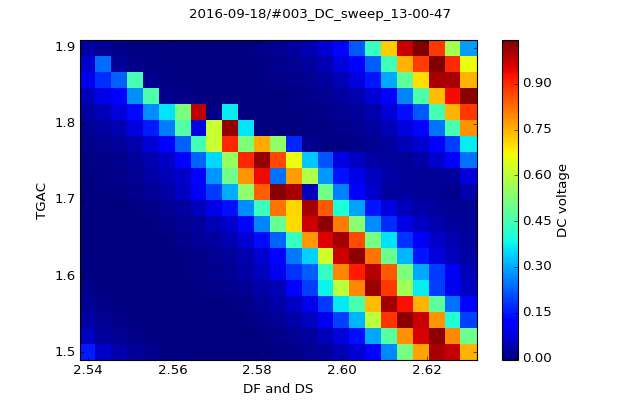

In [6]:
data = qc.load_data('2016-09-18/#003_DC_sweep_13-00-47'`)
plot = qc.MatPlot(data.DC_voltage)

Peak looks stable, about to do ELRLR

<IPython.core.display.Javascript object>


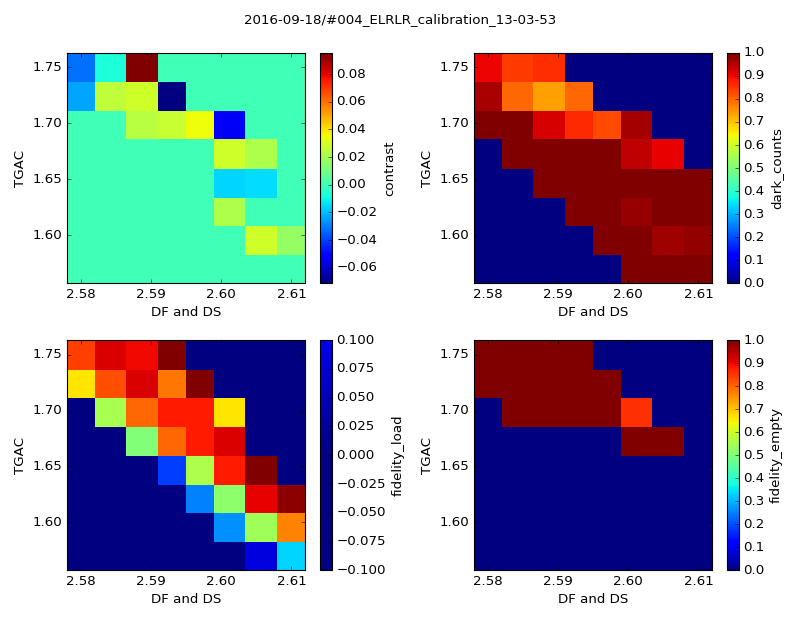

In [7]:
data = qc.load_data('2016-09-18/#004_ELRLR_calibration_13-03-53')

plot = qc.MatPlot(subplots=(2,2), figsize=(10,8))
plot.add(data.contrast, subplot=1, nticks=6)
plot.add(data.dark_counts, subplot=2, nticks=6)
plot.add(data.fidelity_load, subplot=3, nticks=6)
plot.add(data.fidelity_empty, subplot=4, nticks=6)
plot.fig.tight_layout(rect=[0, 0.03, 1, 0.95])

<IPython.core.display.Javascript object>


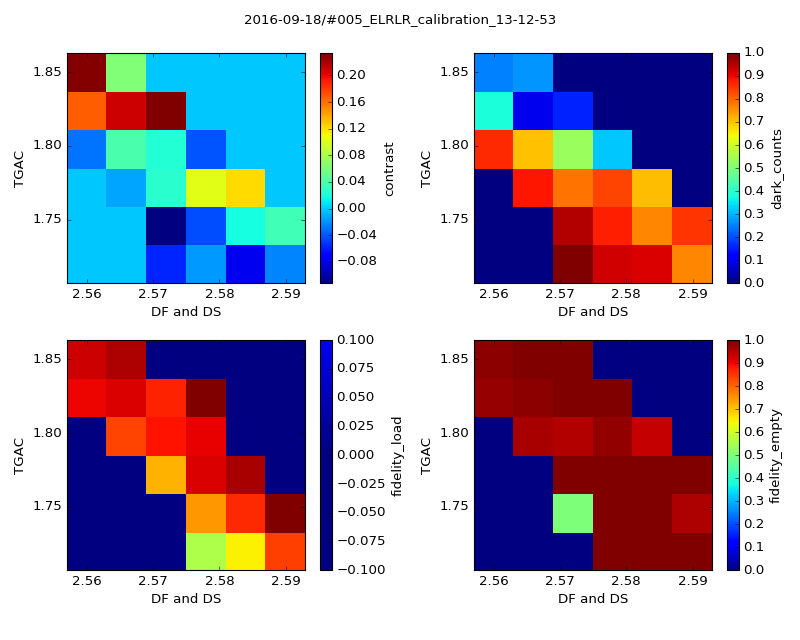

In [8]:
data = qc.load_data('2016-09-18/#005_ELRLR_calibration_13-12-53')

plot = qc.MatPlot(subplots=(2,2), figsize=(10,8))
plot.add(data.contrast, subplot=1, nticks=6)
plot.add(data.dark_counts, subplot=2, nticks=6)
plot.add(data.fidelity_load, subplot=3, nticks=6)
plot.add(data.fidelity_empty, subplot=4, nticks=6)
plot.fig.tight_layout(rect=[0, 0.03, 1, 0.95])

<IPython.core.display.Javascript object>


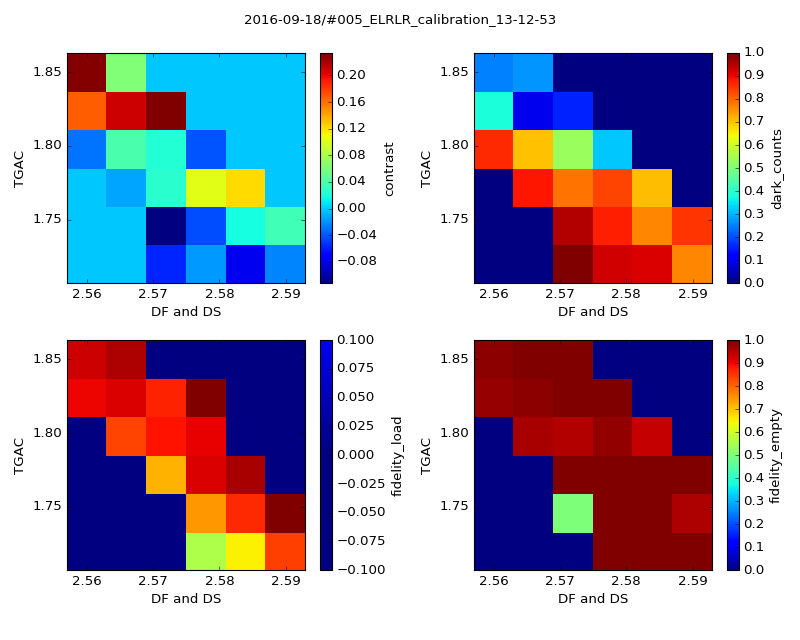

In [8]:
data = qc.load_data('2016-09-18/#006_ELRLR_calibration_13-18-42')

plot = qc.MatPlot(subplots=(2,2), figsize=(10,8))
plot.add(data.contrast, subplot=1, nticks=6)
plot.add(data.dark_counts, subplot=2, nticks=6)
plot.add(data.fidelity_load, subplot=3, nticks=6)
plot.add(data.fidelity_empty, subplot=4, nticks=6)
plot.fig.tight_layout(rect=[0, 0.03, 1, 0.95])

<IPython.core.display.Javascript object>


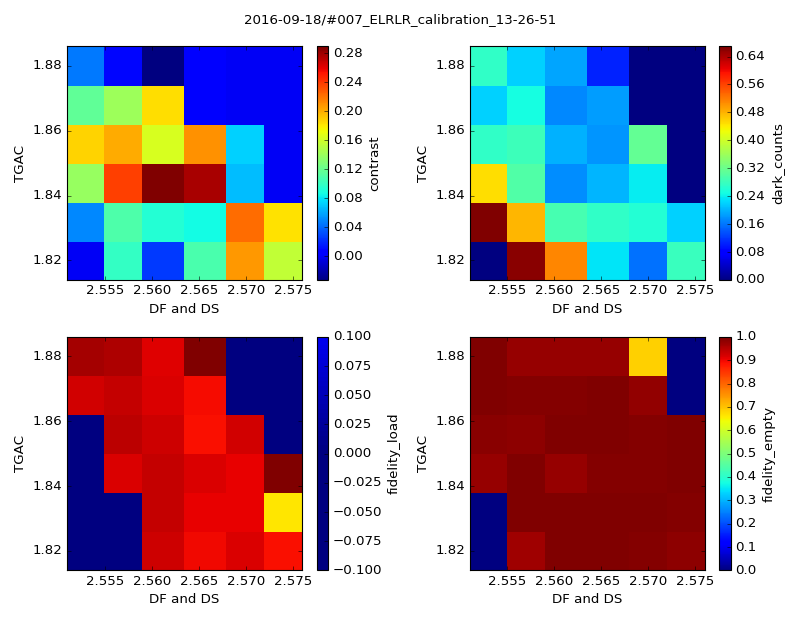

In [9]:
data = qc.load_data('2016-09-18/#007_ELRLR_calibration_13-26-51')

plot = qc.MatPlot(subplots=(2,2), figsize=(10,8))
plot.add(data.contrast, subplot=1, nticks=6)
plot.add(data.dark_counts, subplot=2, nticks=6)
plot.add(data.fidelity_load, subplot=3, nticks=6)
plot.add(data.fidelity_empty, subplot=4, nticks=6)
plot.fig.tight_layout(rect=[0, 0.03, 1, 0.95])

<IPython.core.display.Javascript object>


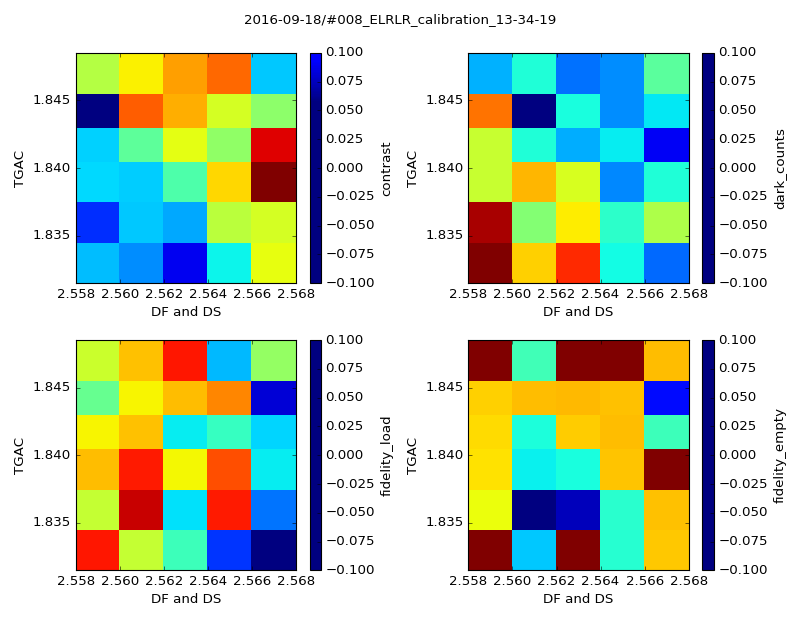

In [10]:
data = qc.load_data('2016-09-18/#008_ELRLR_calibration_13-34-19')

plot = qc.MatPlot(subplots=(2,2), figsize=(10,8))
plot.add(data.contrast, subplot=1, nticks=6)
plot.add(data.dark_counts, subplot=2, nticks=6)
plot.add(data.fidelity_load, subplot=3, nticks=6)
plot.add(data.fidelity_empty, subplot=4, nticks=6)
plot.fig.tight_layout(rect=[0, 0.03, 1, 0.95])

Number of successful sweeps: 14


<IPython.core.display.Javascript object>


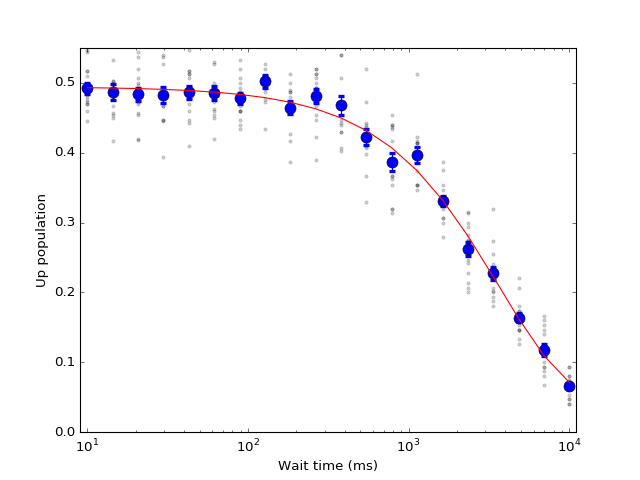

T1 time: 3662 ms
[[Model]]
    Model(fit_function)
[[Fit Statistics]]
    # function evals   = 19
    # data points      = 20
    # variables        = 3
    chi-square         = 0.003
    reduced chi-square = 0.000
    Akaike info crit   = -170.439
    Bayesian info crit = -167.452
[[Variables]]
    offset:      0.04154833 +/- 0.017733 (42.68%) (init= 0.06574944)
    tau:         3662.21407 +/- 322.0839 (8.79%) (init= 4818.546)
    amplitude:   0.45285844 +/- 0.017065 (3.77%) (init= 0.4870309)
[[Correlations]] (unreported correlations are <  0.100)
    C(offset, amplitude)         = -0.971 
    C(offset, tau)               = -0.893 
    C(tau, amplitude)            =  0.819 



In [2]:
data = qc.load_data('2016-09-18/#010_T1_data_13-54-44')
T1_wait_times = data.T1_wait_time_set[0]
T1_wait_times_sorted = np.sort(T1_wait_times)
idx_sorted = np.argsort(T1_wait_times)

max_idx = np.argmin([~np.isnan(np.sum(datarow)) for datarow in data.up_proportion_3_0_0])
print('Number of successful sweeps: {}'.format(max_idx))
vals = data.up_proportion_3_0_0[:max_idx]
vals_sorted = vals[:,idx_sorted]
vals_mean_sorted = np.mean(vals_sorted,axis=0)
vals_std_sorted = np.std(vals_sorted,axis=0)
vals_std_mean_sorted = vals_std_sorted/np.sqrt(max_idx)


fig = plt.figure()
ax = fig.gca()
for datarow in vals_sorted:
    ax.plot(T1_wait_times_sorted, datarow, 'ok', ms=3, alpha=0.2)
(_, caps, _) = ax.errorbar(T1_wait_times_sorted, vals_mean_sorted, yerr=vals_std_mean_sorted, 
                           marker='o', linestyle='',ms=10)
for cap in caps:
    cap.set_markeredgewidth(3)
    
# Fitting 
mod = fit_toolbox.ExponentialFit()
result=mod.perform_fit(T1_wait_times_sorted,vals_mean_sorted)#, weights=1/np.power(vals_std_mean_sorted,2))
print('T1 time: {:.0f} ms'.format(result.best_values['tau']))
plt.plot(T1_wait_times_sorted, result.best_fit, 'r-')

ax.set_xscale("log")
ax.set_xlim([0.9*T1_wait_times_sorted[0], 1.1*T1_wait_times_sorted[-1]])
ax.set_ylim([0, 0.55])

ax.set_xlabel('Wait time (ms)')
ax.set_ylabel('Up population')
print(result.fit_report())

In [1]:
data = qc.load_data('2016-09-19/#001_variable_read_10-30-49')
plot = qc.MatPlot(data.Channel_A_signal)

NameError: name 'qc' is not defined